<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The goal of this project is to optimize a porfolio of stocks using Efficient Frontier

In [ ]:
# Geting some information from yahoo finance
!pip install yfinance

### Import & Install Libraries

In [75]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')


### Data Collection:  Accessed yahoo finance API for historical stock data

In [114]:
import pandas as pd

portfolio_tickers = ["BRK-B","MSFT","GE","AMT"]

historical_data = yf.download(portfolio_tickers, start="2021-04-01", end=None)["Adj Close"]

df = pd.DataFrame(historical_data)

df


[*********************100%%**********************]  4 of 4 completed


Ticker,AMT,BRK-B,GE,MSFT
Date,,,,
2021-04-01,221.828598,258.200012,82.132713,236.118607
2021-04-05,226.162430,262.660004,83.245964,242.665802
2021-04-06,225.081268,263.059998,82.874878,241.486954
2021-04-07,226.125488,263.619995,82.813042,243.474472
2021-04-08,222.798859,263.510010,83.184128,246.738342
...,...,...,...,...
2024-03-25,195.559998,409.920013,173.490005,422.859985
2024-03-26,194.100006,411.570007,173.550003,421.649994
2024-03-27,197.380005,416.929993,180.119995,421.429993


### Visualization of Portfolio Adjusted Price History over time

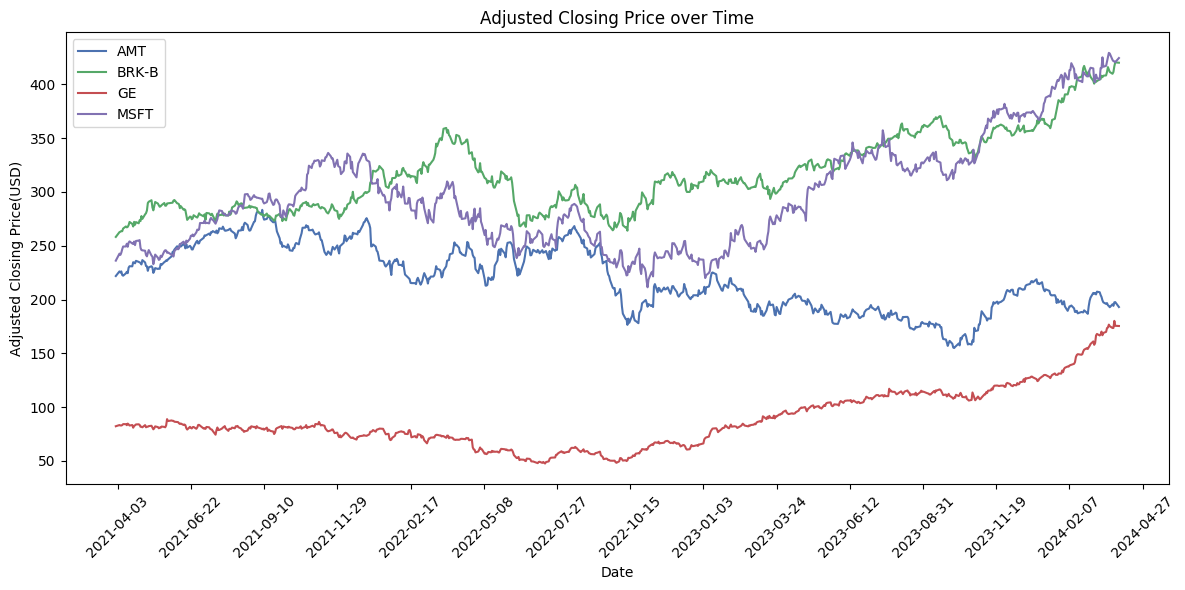

In [115]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)       # Creates and plots the graph

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price(USD)")
plt.title("Adjusted Closing Price over Time")
plt.legend()
plt.grid(False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

In [109]:
# Calculating the daily return
daily_returns = df.pct_change()
daily_returns

Ticker,AMT,BRK-B,GE,UNH
Date,,,,
2021-04-01,NaN,NaN,NaN,NaN
2021-04-05,0.019537,0.017273,0.013554,0.008472
2021-04-06,-0.004780,0.001523,-0.004458,-0.015695
2021-04-07,0.004639,0.002129,-0.000746,0.003486
2021-04-08,-0.014711,-0.000417,0.004481,-0.002051
...,...,...,...,...
2024-03-25,0.014368,-0.004082,-0.009478,-0.008550
2024-03-26,-0.007466,0.004025,0.000346,0.013234
2024-03-27,0.016898,0.013023,0.037856,0.001605


In [110]:
# Create and show the annual covariance of the portfolio
annual_covariance = daily_returns.cov()*252
annual_covariance

Ticker,AMT,BRK-B,GE,UNH
Ticker,,,,
AMT,0.069030,0.017676,0.017071,0.014837
BRK-B,0.017676,0.029469,0.027472,0.014315
GE,0.017071,0.027472,0.084715,0.012909
UNH,0.014837,0.014315,0.012909,0.046792


In [111]:
# Calculating the portfolio variance

portfolio_variance = daily_returns.var() * 252
portfolio_variance

Ticker
AMT      0.069030
BRK-B    0.029469
GE       0.084715
UNH      0.046792
dtype: float64

In [112]:
# Calculate the portfolio volatility aka standard deviation

annualized_volatility = daily_returns.std() * np.sqrt(252)
print("Annual Volatility:", annualized_volatility)


Annual Volatility: Ticker
AMT      0.262736
BRK-B    0.171665
GE       0.291058
UNH      0.216315
dtype: float64


In [ ]:
pip install PyPortfolioOpt


In [100]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [116]:
# To calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMT', -0.68725), ('BRK-B', 0.87581), ('GE', 0.40161), ('MSFT', 0.40983)])
Expected annual return: 39.1%
Annual volatility: 28.2%
Sharpe Ratio: 1.32


(0.3912725053860554, 0.281738785413111, 1.3177898273454325)